# Price Prediction using Regression

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv("C:/Users/hp/data1.csv")
df = data.copy()

In [3]:
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [5]:
df.shape

(215909, 9)

In [6]:
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

In [7]:
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


In [8]:
df.describe(include = 'all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


Insights from Summary Statistics above

### insert_date:
Well, it doesn't really tell much. But the date when most people paid for ticket price is '2019-05-09 15:02:02', A total of 90 people did that.

### origin:
There are total of 5 origin train stations. And most people (105469 number of people) boarded from Madrid.

### destination:
Same as above. Most people (a total of 105469 people) landed on Madrid stations.

### start_date and end_date:
Most tickets are starting and expiring at '2019-06-02'. Although this frequency seems not to matter much.

### train_type:
There are 16 types of train. The type 'AVE' is the most boarded train: out of 215909, 126577 people boarded from this type. Perhaps, price wise, 'AVE' type is the most affordable option for people. We'll see later.

### price:
'price' is the only numerical variable we have here. By looking at its mean (56.723877) & median (53.400000), we can see that the price data tends to be symmetrical. Although, the min price is 16.600000 and max price is 206.800000. This shows that price range is quite big which shows that this data might need scaling afterwards.

### train_class:
There are a total of 5 train classes. 'Turista' is the most used train class. Perhaps because Turista is an affordable option for people price wise. We'll see about that later. 

### fare:
There are 5 types of fare, out of which, promo is the most opted for option. Might be because its the most affordable. We'll see.

In [9]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

In [11]:
avg_price=df['price'].astype("float").mean(axis=0)
df['price'].replace(np.nan, avg_price, inplace= True)

In [12]:
df.dropna(subset=["train_class", "fare"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.drop(["insert_date"], axis = 1, inplace = True)

In [14]:
#write code here
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

In [15]:
df.origin.value_counts()

MADRID        109975
BARCELONA      39479
VALENCIA       36297
SEVILLA        26979
PONFERRADA      2536
Name: origin, dtype: int64

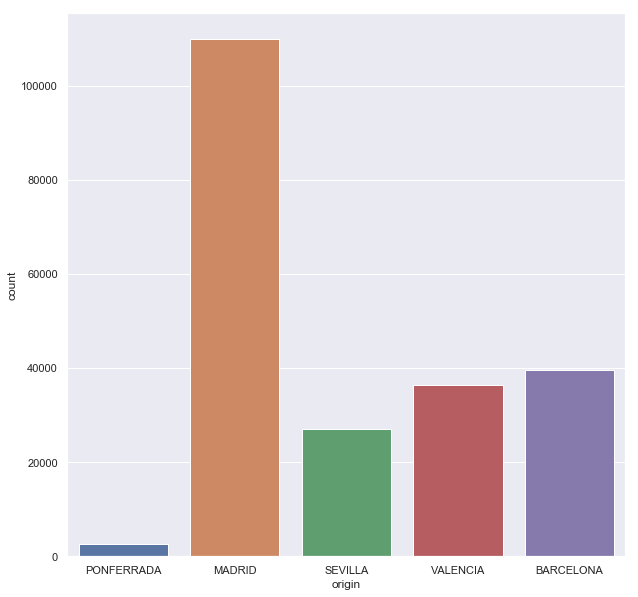

In [16]:
plt.figure(figsize =(10,10))
sns.countplot(x='origin', data=df );

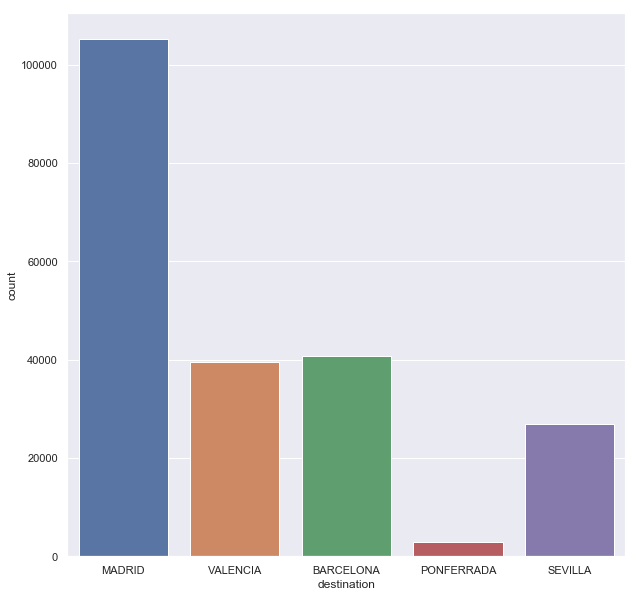

In [17]:
plt.figure(figsize =(10,10))
sns.countplot(x='destination', data= df);

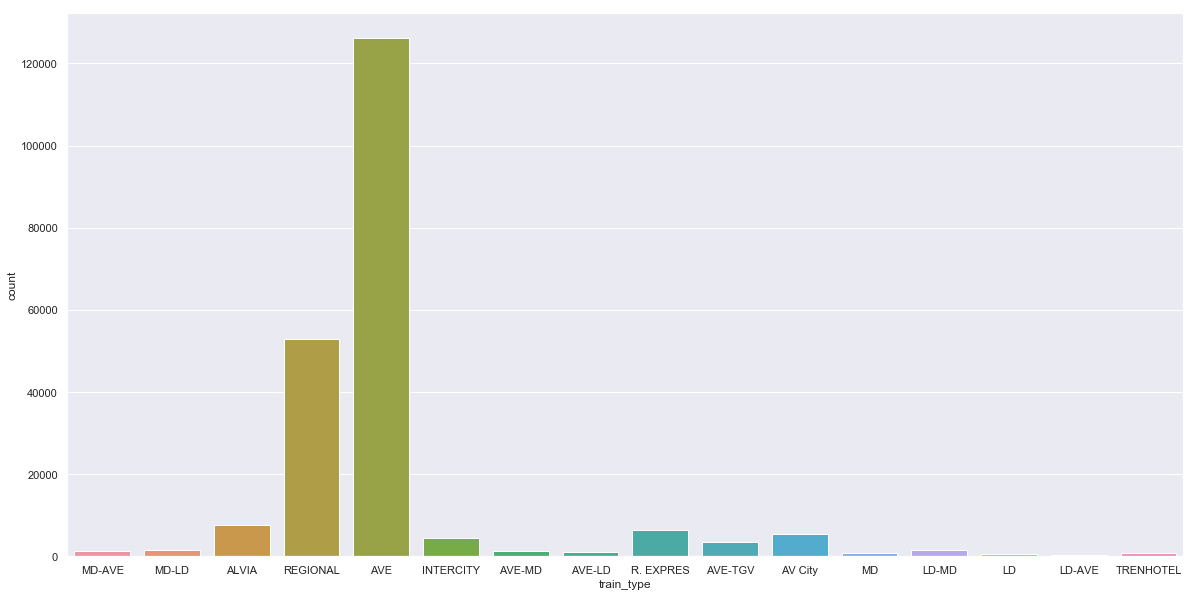

In [18]:
plt.figure(figsize = (20,10))
sns.countplot(x='train_type', data= df);

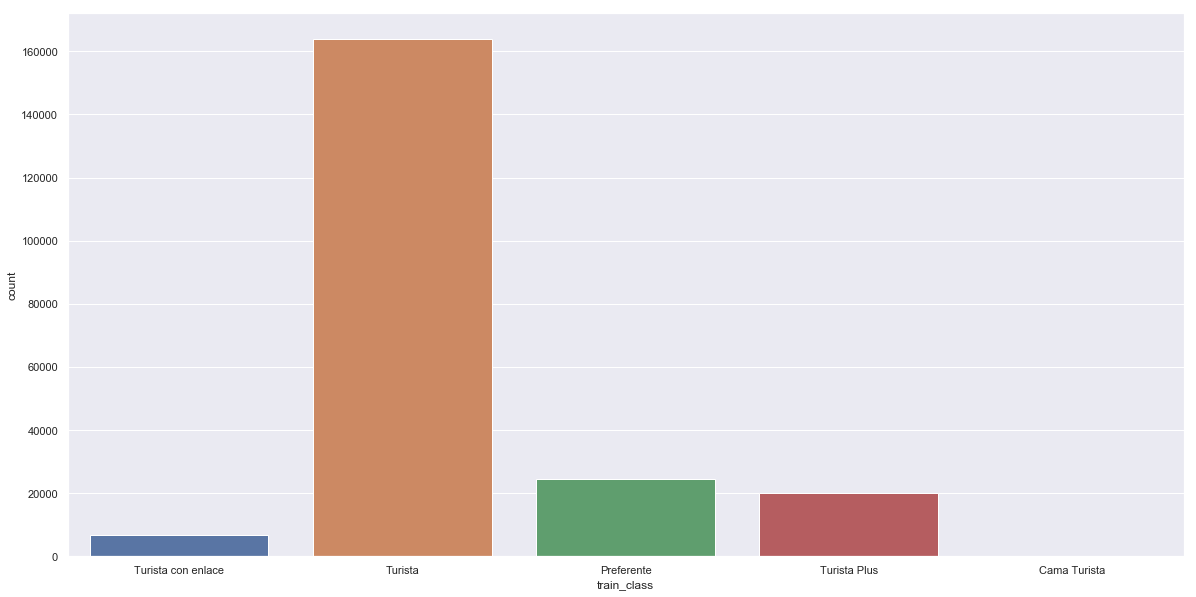

In [19]:
plt.figure(figsize= (20,10))
sns.countplot(x='train_class', data= df);

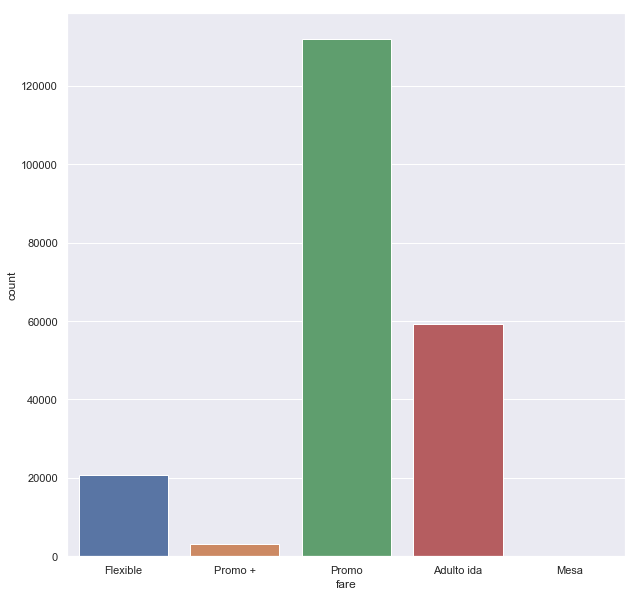

In [21]:
plt.figure(figsize= (10,10))
sns.countplot(x= 'fare', data= df);

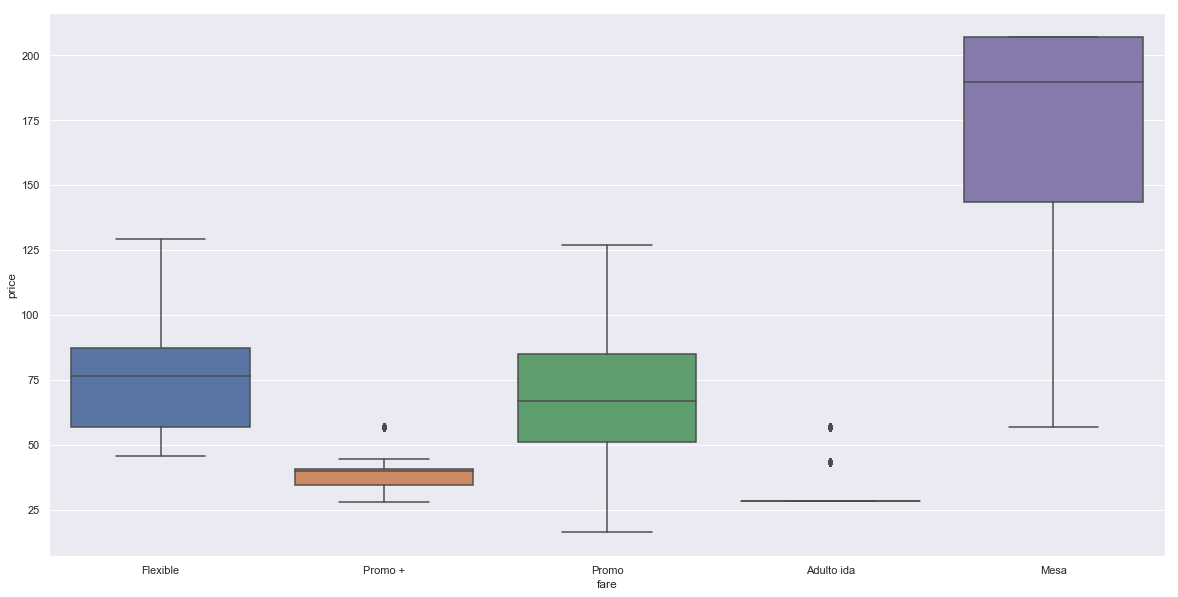

In [23]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'fare', y= 'price',data = df);

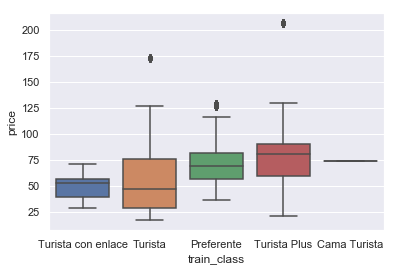

In [24]:
sns.boxplot(x ='train_class', y='price', data = df);

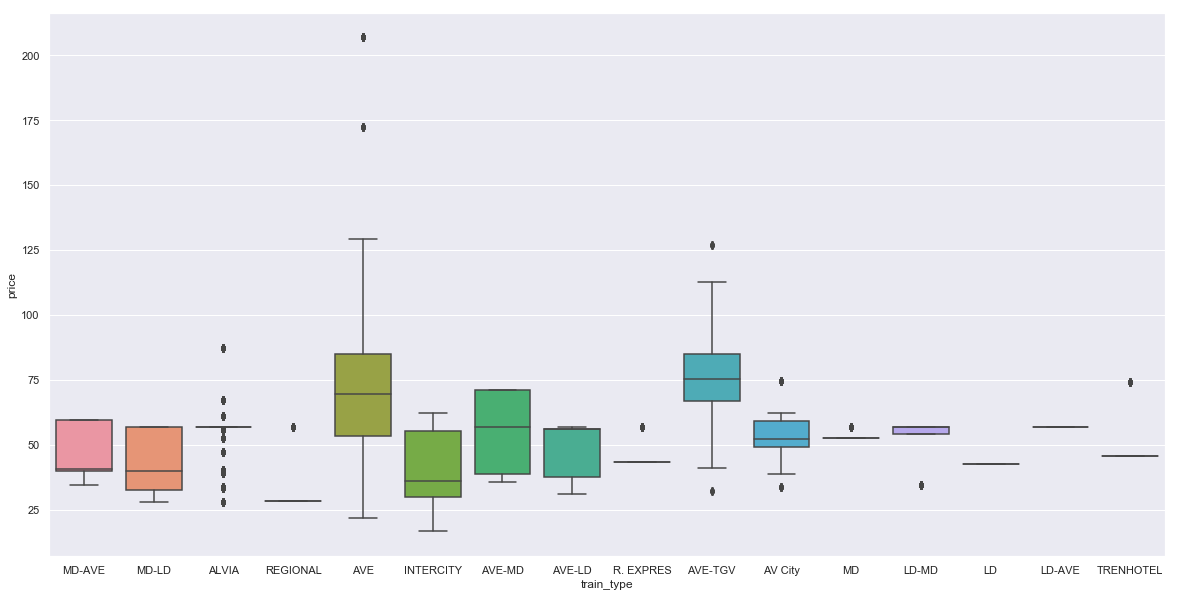

In [25]:
plt.figure(figsize= (20, 10))
sns.boxplot(x='train_type', y= 'price', data = df);

## Feature Engineering


In [26]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [27]:
import datetime

In [28]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [29]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']), axis = 1) 

In [30]:
df.drop(['start_date', 'end_date'], axis = 1, inplace = True)

In [31]:
df.head()         

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333


## **Travelling from MADRID to SEVILLA**

In [32]:
df1  = df[(df['origin'] == 'MADRID') & (df['destination'] == 'SEVILLA')]

In [33]:
df1.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
364,364,MADRID,SEVILLA,AV City,49.150000,Turista,Promo,2.916667
365,365,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.733333
366,366,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo,2.633333
367,367,MADRID,SEVILLA,AVE,76.300000,Turista,Flexible,2.533333
368,368,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.600000


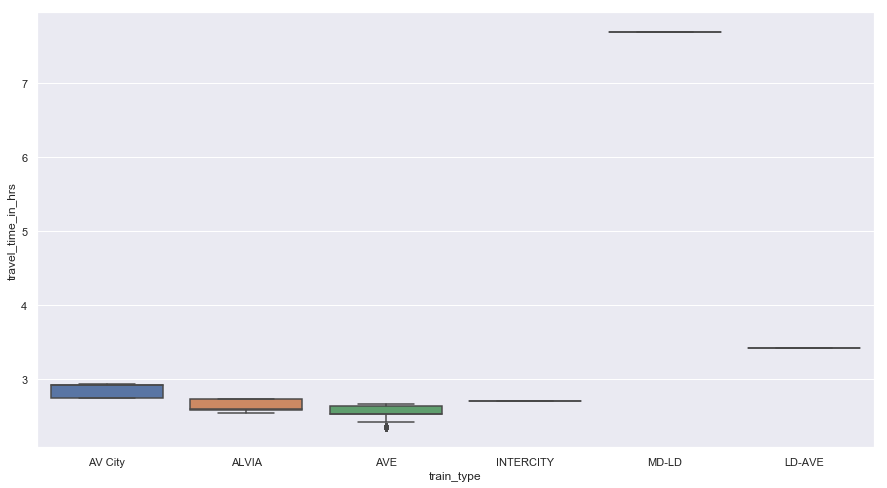

In [34]:
plt.figure(figsize = (15, 8))
sns.boxplot (x= "train_type" , y = "travel_time_in_hrs" , data = df1);

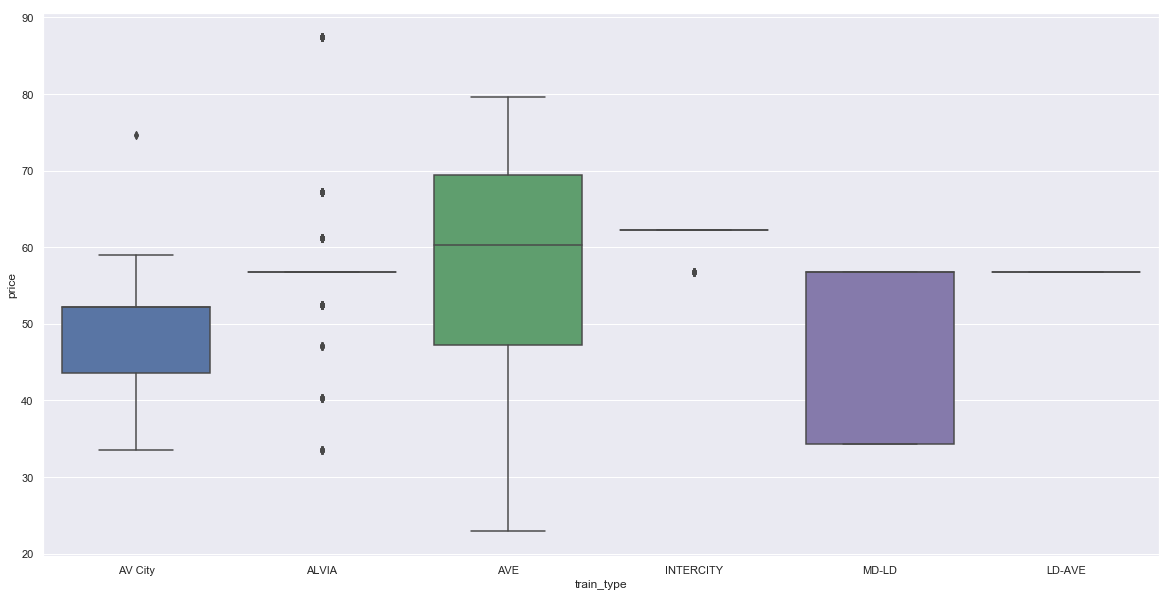

In [35]:
plt.figure(figsize = (20, 10))
sns.boxplot (x= "train_type" , y = "price" , data = df1);

## **Travelling from MADRID to BARCELONA**


In [36]:
df2 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'BARCELONA')]

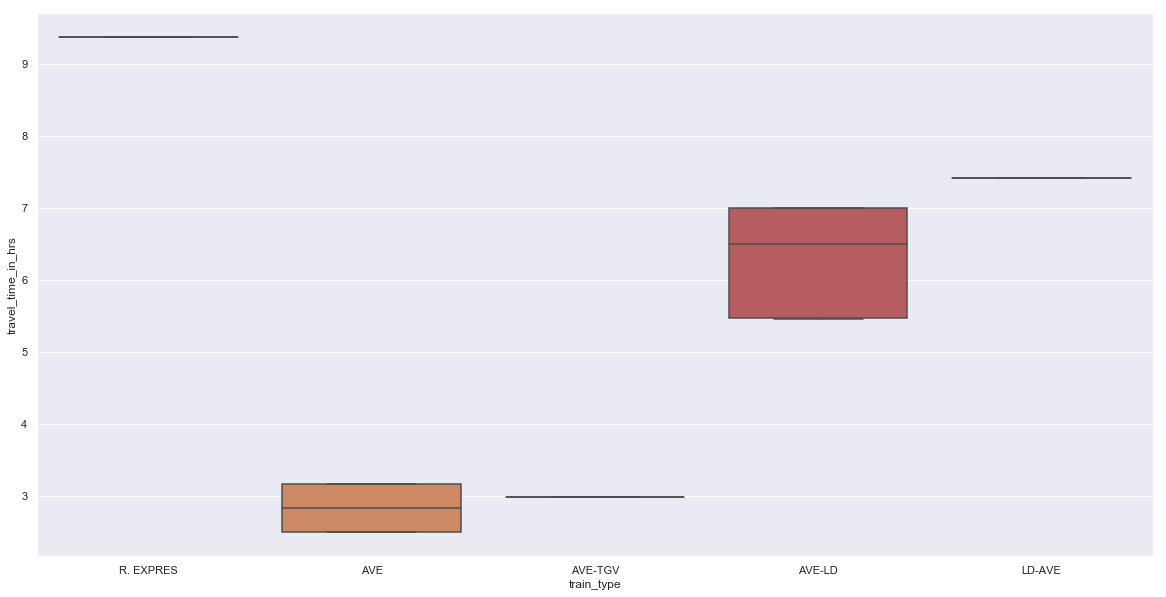

In [37]:
plt.figure(figsize = (20, 10))
sns.boxplot (x= "train_type" , y = "travel_time_in_hrs" , data = df2);

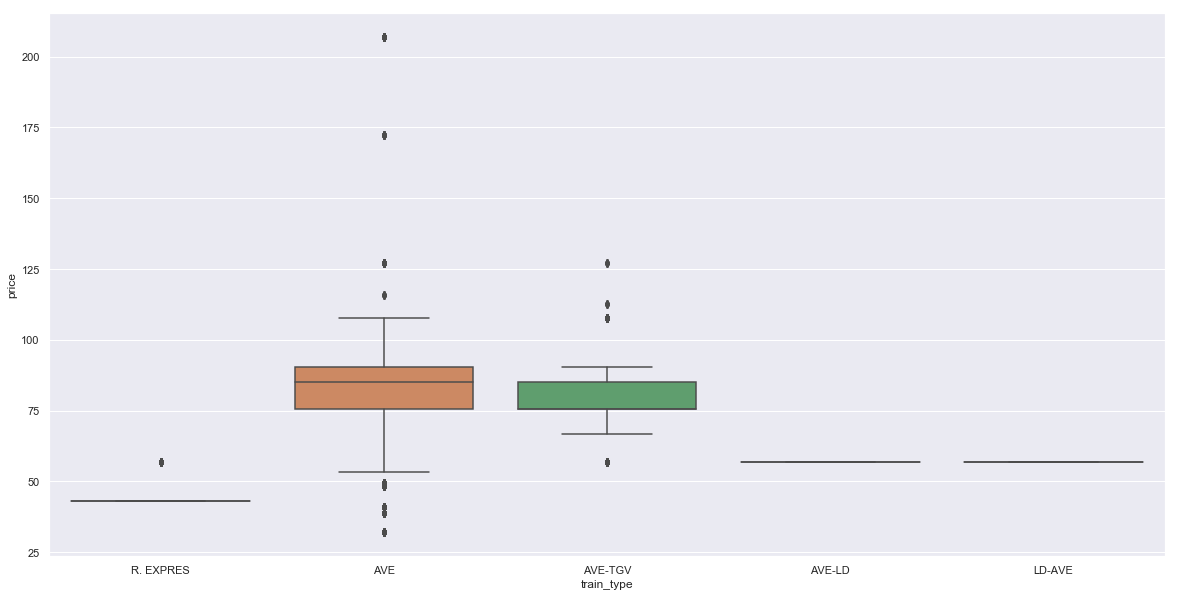

In [38]:
plt.figure(figsize = (20, 10))
sns.boxplot (x= "train_type" , y = "price" , data = df2);

## **Travelling from MADRID to VALENCIA**

In [39]:
df3 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'VALENCIA')]

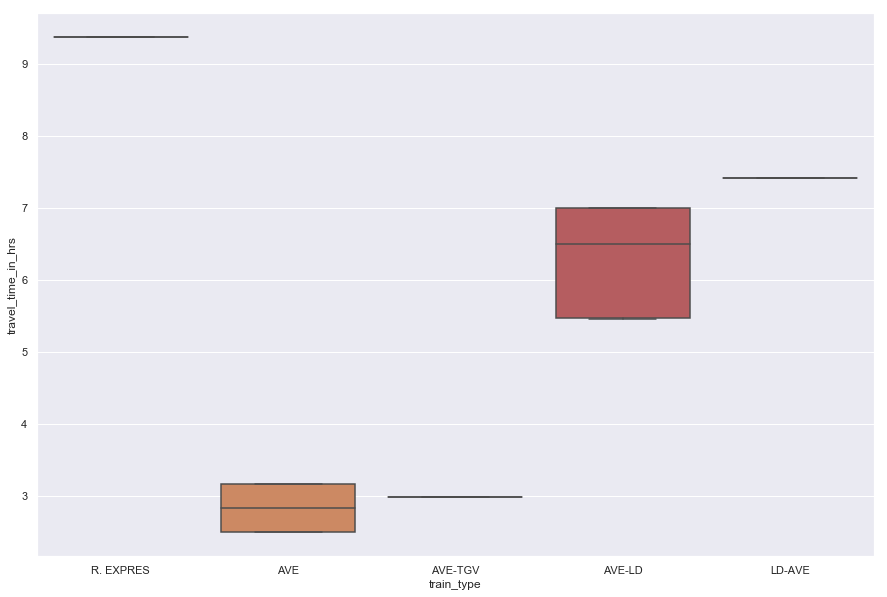

In [40]:
plt.figure(figsize = (15, 10))
sns.boxplot (x= "train_type" , y = "travel_time_in_hrs" , data = df2);

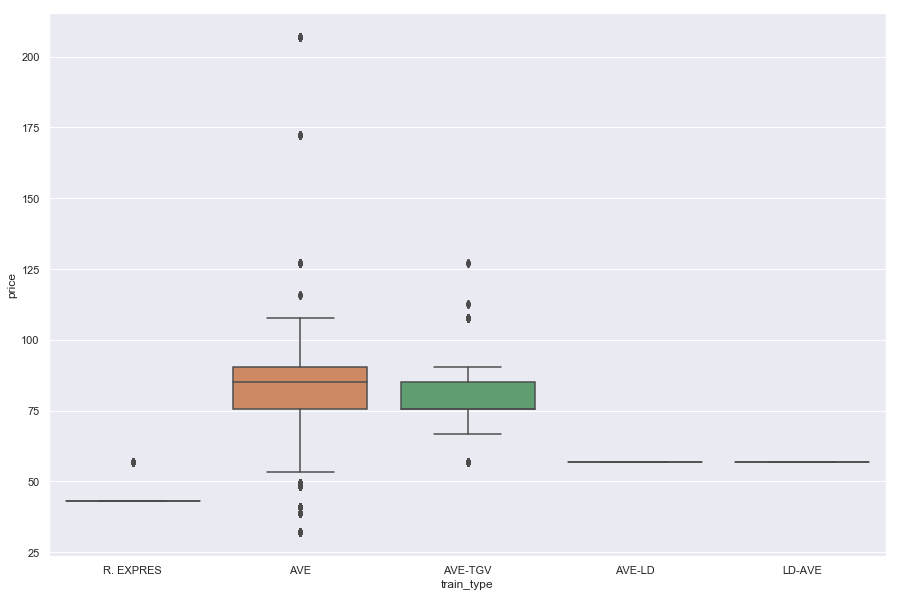

In [41]:
plt.figure(figsize = (15, 10))
sns.boxplot (x= "train_type" , y = "price" , data = df2);

## **Travelling from MADRID to PONFERRADA**

In [42]:
df3 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'PONFERRADA')]

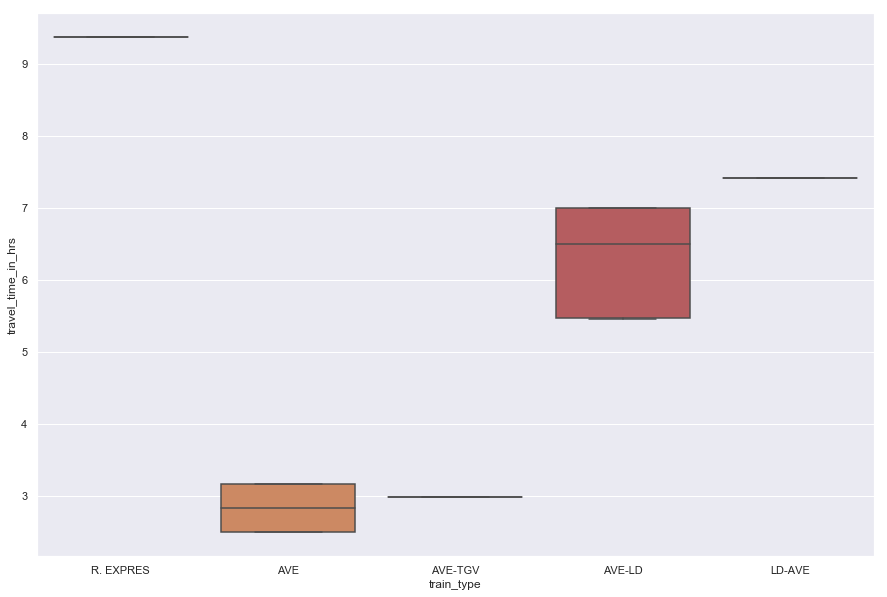

In [43]:
plt.figure(figsize = (15, 10))
sns.boxplot (x= "train_type" , y = "travel_time_in_hrs" , data = df2);

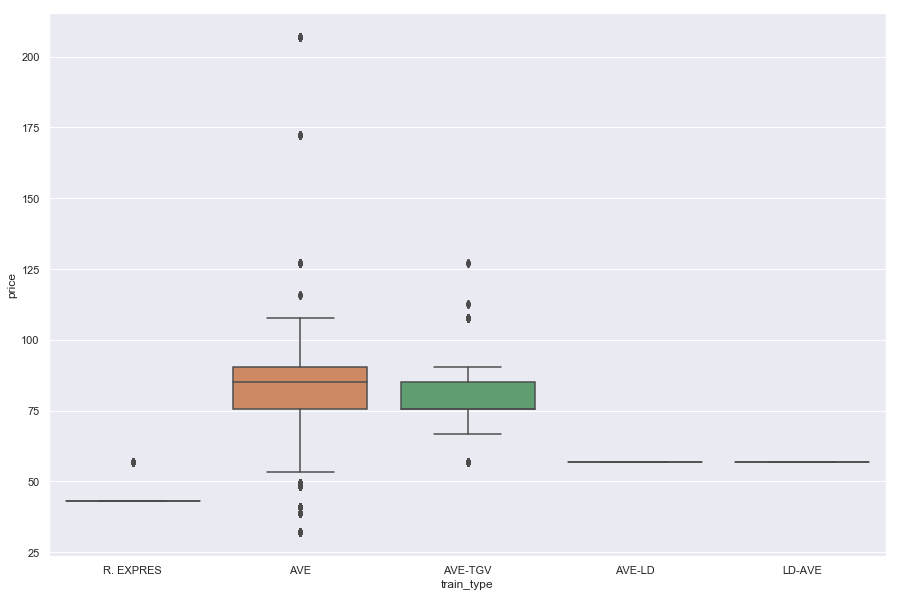

In [44]:
plt.figure(figsize = (15, 10))
sns.boxplot (x= "train_type" , y = "price" , data = df2);

# Applying Linear  Regression

In [45]:
from sklearn.preprocessing import LabelEncoder 

**Data Encoding**

In [46]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [47]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333


In [48]:
X = df.drop(['price'], axis = 1)
Y = df[['price']]

In [49]:
X.shape

(215266, 7)

In [50]:
Y.shape

(215266, 1)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size= 0.30, random_state = 25, shuffle = True)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(150686, 7) (150686, 1)
(64580, 7) (64580, 1)


In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [54]:
model.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
lr_predic = model.predict(X_test)

In [57]:
lr_predict = model.predict(X_train)

In [58]:
from sklearn.metrics import r2_score

In [59]:
lr_r2_test= r2_score(Y_test, lr_predic)

In [60]:
lr_r2_train = r2_score(Y_train, lr_predict)

In [61]:
print('R2 score for Linear Regression Testing Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Testing Data is:  0.7256162112503854
R2 score for Linear Regression Testing Data is:  0.7309823500908177


# Applying Polynomial Regression

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly_reg = PolynomialFeatures(degree=2)

In [64]:
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [65]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
Y_train_predicted = poly_model.predict(X_train_poly)
Y_test_predict =  poly_model.predict(X_test_poly)

In [67]:
#evaluating the model on training dataset
r2_train = r2_score(Y_train, Y_train_predicted)

In [68]:
# evaluating the model on test dataset
r2_test = r2_score(Y_test, Y_test_predict)

Comaparing training and testing R2 scores

In [69]:
#write code here
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8226182539221675
The r2 score for testing set is:  0.8230783158989039


In [70]:
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.7256791512570238, 0.8226182539221675, 0.8182251846533672, 0.720784801734389, 0.39395367754147714]
R2 Test [0.7309201466314377, 0.8230783158989039, 0.8194924848392183, 0.7229423773365345, 0.4032104074694184]


#### Plotting the model

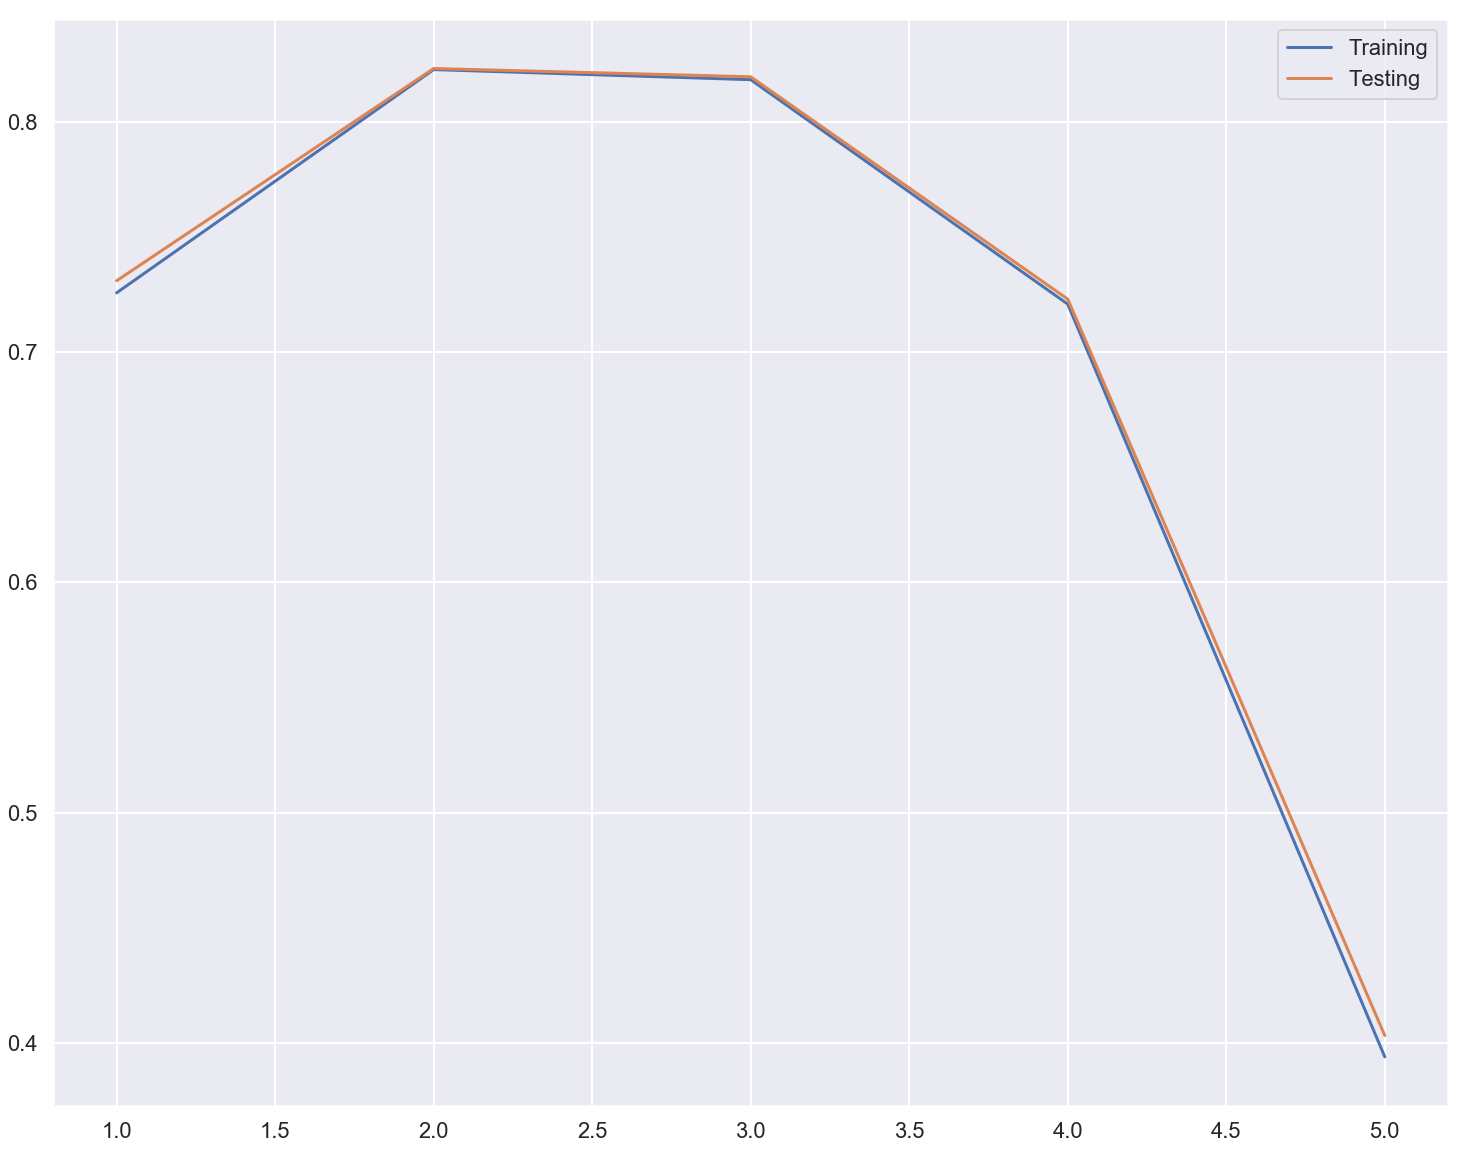

In [71]:
plt.figure(figsize=(25,20))
sns.set_context('poster')
#plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
#plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');